# Task 6 : Prediction using Decision Tree Algorithm

# Author : Marreddy Sai Vineel Reddy

Decision Trees are versatile ML algorithms that can perform both classification and regression tasks, and even multioutput tasks.For the given ‘Iris’ dataset, I have created Decision Tree classifier and visualized it graphically. The purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import umap.umap_ as umap

from sklearn.tree import DecisionTreeClassifier # For building DecisionTree classifier model.
from sklearn.tree import plot_tree # For tree visualization.
from sklearn.model_selection import cross_val_score # For cross validatation.
from sklearn.model_selection import GridSearchCV # For fine tuning the data.
from sklearn.metrics import plot_confusion_matrix # For ploting the confusion matrix

In [5]:
# Reading the data
iris= pd.read_csv("Iris.csv")

In [6]:
# Display the data first 5 rows
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Display descriptive statistics about the data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
X = iris.drop(axis=1,columns=['Id','Species']) # Selecting the features 
y = iris['Species'] # Selecting the label

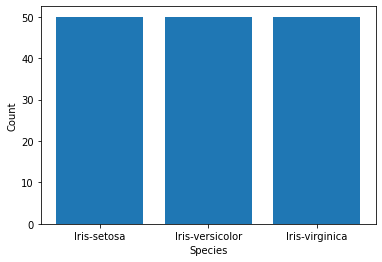

In [9]:
# Check if the data is balanced
plt.bar(y.unique(),y.value_counts())
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

In [10]:
# Train the decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X,y)
dtree.score(X,y)

1.0

In [11]:
np.random.seed(1) # a line to get the same randomization every run.
cross_val_result = cross_val_score(dtree, X, y, cv=5)
print(np.average(cross_val_result))

0.9666666666666668


In [12]:
# Perform finetuning using grid search for the chosen paramters.
parameters = {'ccp_alpha': [0.0,0.1,0.5,1],
 'criterion': ['gini','entropy'],
 'max_depth': [2,3,4,5]}

dtree = GridSearchCV(dtree, parameters)
dtree.fit(X,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.5, 1],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5]})

In [13]:
dtree.best_params_

{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 3}

In [14]:
np.random.seed(1)
cross_val_result = cross_val_score(dtree, X, y, cv=3)
print(np.average(cross_val_result))

0.9666666666666667


In [15]:
y_pred = dtree.predict(X) # The predicted labels

C:\Users\vinee\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


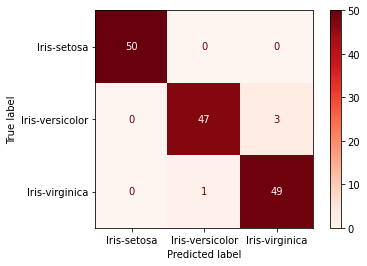

In [16]:
# Plot the confusion matrix
plot_confusion_matrix(dtree,X,y,cmap='Reds')
plt.show()

In [17]:
X_embedded = umap.UMAP(n_neighbors=5, random_state=42).fit(X)

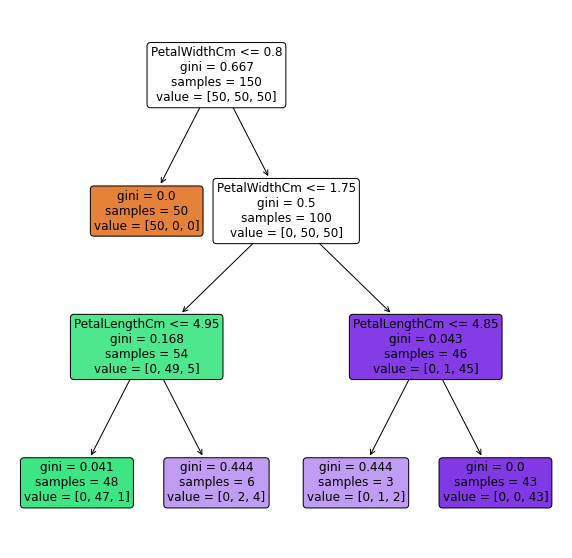

In [18]:
plt.figure(figsize=(10,10))
plot_tree(dtree.best_estimator_,fontsize=12,feature_names=X.columns,filled=True,rounded=True)
plt.show()

# Conclusion

I was able to successfully carry-out the prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score.